In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [161]:
# loading dataset
data=pd.read_csv("Global_Pollution_Analysis.csv")

In [162]:
data.sample(5)

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
157,Latvia,2019,136.87,44.33,23.48,55331.21,31.51,10.83,32.45,38142.43,8.65,98.60,22685.34
50,United States Virgin Islands,2004,155.17,144.60,21.23,10334.43,480.99,10.48,42.65,13881.14,15.95,36.58,53763.57
185,Western Sahara,2016,114.45,111.88,121.19,48981.55,304.60,35.53,34.53,36190.09,14.21,197.69,47679.79
34,Argentina,2017,256.63,116.89,145.76,4431.63,455.69,39.62,15.74,13499.94,3.72,100.79,18908.07
133,Belgium,2013,282.69,180.91,32.45,80476.81,277.74,17.04,22.31,683.34,6.26,184.54,5715.26


In [163]:
le=LabelEncoder()
data['Country']=le.fit_transform(data['Country'])
data['Year']=le.fit_transform(data['Year'])

In [164]:
# Handling missing values for numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [165]:
# scalling the data
scaler=StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [166]:
data.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,-0.232434,-0.753796,1.376167,0.193880,-0.619764,1.543328,-0.697051,-1.356325,1.079423,0.874923,0.561742,-1.093143,-0.737646
1,1.173213,-1.449340,-1.403578,-1.153098,1.028744,0.124915,1.618760,-1.284276,0.700701,0.600289,-0.756197,0.580978,-0.023527
2,0.952326,1.158950,-1.330788,-0.668076,1.142400,0.123888,1.560644,1.718910,-1.493780,-0.395504,0.667825,0.355836,1.156054
3,-1.015580,1.506722,1.494394,-1.009403,0.431675,0.809131,-0.785350,-1.106232,-0.716061,-1.064327,-1.556310,-0.642506,-0.693157
4,-0.854934,-0.232138,-0.021926,0.262567,1.138106,0.882681,-1.499375,-0.689181,0.502825,1.024815,0.612087,1.448956,0.312447


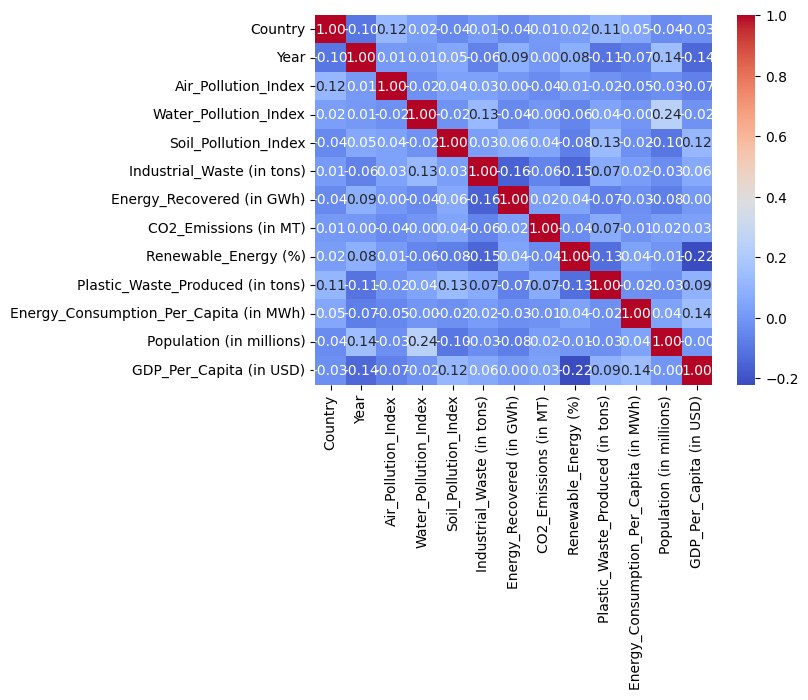

In [167]:
import seaborn as sns

# heatmap
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [168]:
x = data[["Air_Pollution_Index", "CO2_Emissions (in MT)", "Industrial_Waste (in tons)"]]
y = data["Energy_Recovered (in GWh)"]

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [170]:
from sklearn.metrics import mean_squared_error

model_lr=LinearRegression()
model_lr.fit(x_train, y_train)
y_pred=model_lr.predict(x_test)
print("LinearRegression MSE", mean_squared_error(y_test, y_pred))

LinearRegression MSE 0.8864471536091013


In [171]:
y_pred

array([-0.07224261,  0.01732545,  0.04699675,  0.23511637,  0.22392198,
       -0.05471375, -0.09054378, -0.27869657,  0.04135705,  0.01908273,
        0.27310819,  0.07488803, -0.022718  ,  0.11191301, -0.14976374,
       -0.18203892,  0.27123022,  0.18916603,  0.13819608, -0.34526504,
       -0.15076338,  0.26981538, -0.24438034, -0.33443049,  0.09401229,
        0.26523387, -0.21618539, -0.0232117 , -0.06320832, -0.37875785,
       -0.32734587,  0.16800056,  0.18102331, -0.04838014, -0.1582813 ,
       -0.34642087, -0.16294721, -0.18204742, -0.30972279,  0.09083413])

In [172]:
y_test

18     1.207106
170   -1.103119
107    1.224071
98    -0.390525
177   -0.041688
182    0.495261
5     -0.846124
146    0.741627
12    -0.565284
152    0.720302
61     0.353274
125    1.310531
180   -0.058925
154    0.337059
80     1.383159
7      1.631978
33     1.293770
130   -1.106185
37     0.864401
74    -0.412804
183   -0.191579
145   -1.158851
45     1.096391
159   -0.587358
60     1.585239
123    1.361834
179    0.323364
185    0.300812
122   -0.723418
44    -1.091604
16     0.032031
55     0.758592
150   -1.421568
111    1.578154
22    -0.282603
189    0.392314
129   -0.034943
4     -1.499375
83     0.534914
106   -0.181018
Name: Energy_Recovered (in GWh), dtype: float64

In [173]:
from sklearn.metrics import r2_score

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.08803585104591893


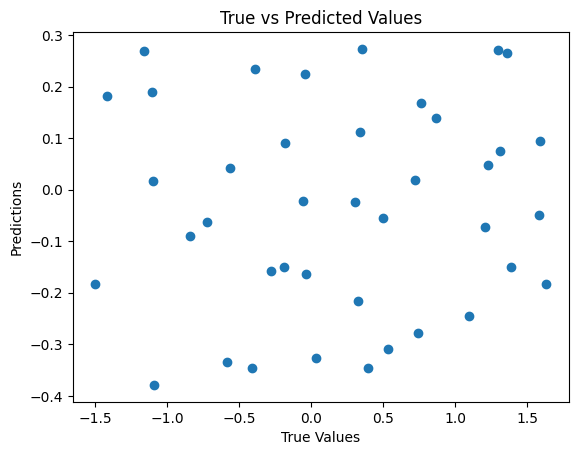

In [174]:
# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

confusion_matrix [[ 0  6  0]
 [ 0 24  0]
 [ 0 10  0]]


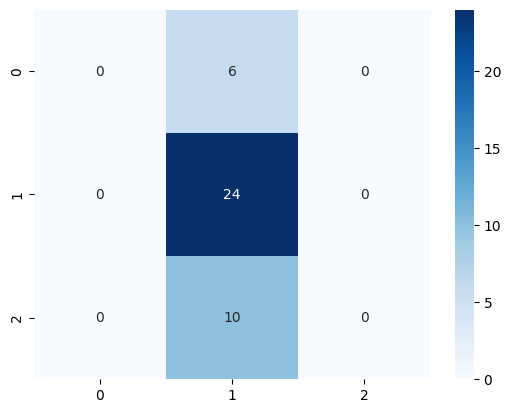

In [175]:
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
print("confusion_matrix",cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

In [176]:
data.corr()['Energy_Recovered (in GWh)']

Country                                  -0.044316
Year                                      0.088332
Air_Pollution_Index                       0.002997
Water_Pollution_Index                    -0.041828
Soil_Pollution_Index                      0.064076
Industrial_Waste (in tons)               -0.161309
Energy_Recovered (in GWh)                 1.000000
CO2_Emissions (in MT)                     0.024758
Renewable_Energy (%)                      0.043533
Plastic_Waste_Produced (in tons)         -0.072946
Energy_Consumption_Per_Capita (in MWh)   -0.030284
Population (in millions)                 -0.075100
GDP_Per_Capita (in USD)                   0.004535
Name: Energy_Recovered (in GWh), dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_12508\1609364935.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data["Country"], y=data["Population (in millions)"], ci=None, palette="viridis")
C:\Users\Asus\AppData\Local\Temp\ipykernel_12508\1609364935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Country"], y=data["Population (in millions)"], ci=None, palette="viridis")


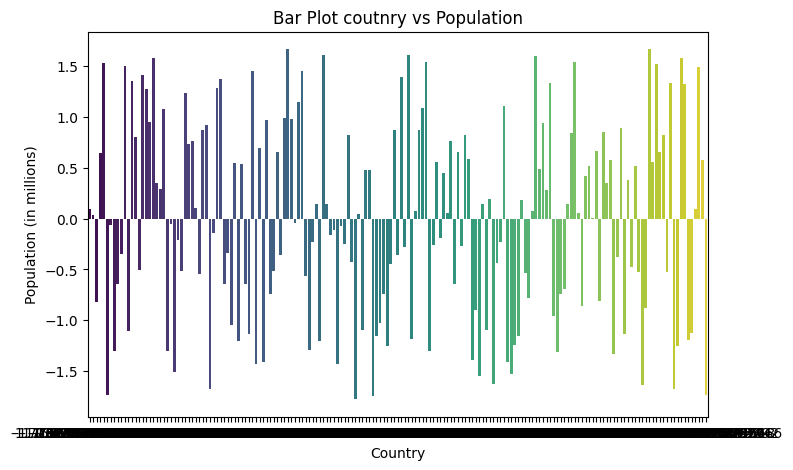

In [177]:
# bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=data["Country"], y=data["Population (in millions)"], ci=None, palette="viridis")
plt.title("Bar Plot coutnry vs Population")
plt.xlabel("Country")
plt.ylabel("Population (in millions)")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12508\2717630097.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data["Year"], y=data["Population (in millions)"], ci=None, palette="viridis")
C:\Users\Asus\AppData\Local\Temp\ipykernel_12508\2717630097.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=data["Year"], y=data["Population (in millions)"], ci=None, palette="viridis")


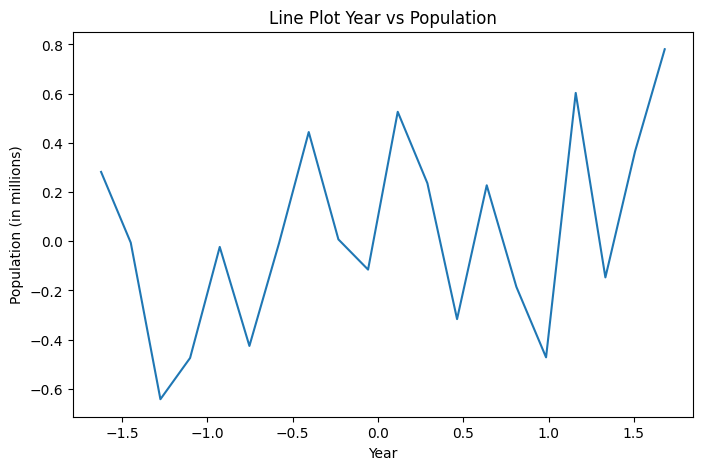

In [178]:
# Line plot
plt.figure(figsize=(8,5))
sns.lineplot(x=data["Year"], y=data["Population (in millions)"], ci=None, palette="viridis")
plt.title("Line Plot Year vs Population")
plt.xlabel("Year")
plt.ylabel("Population (in millions)")
plt.show()

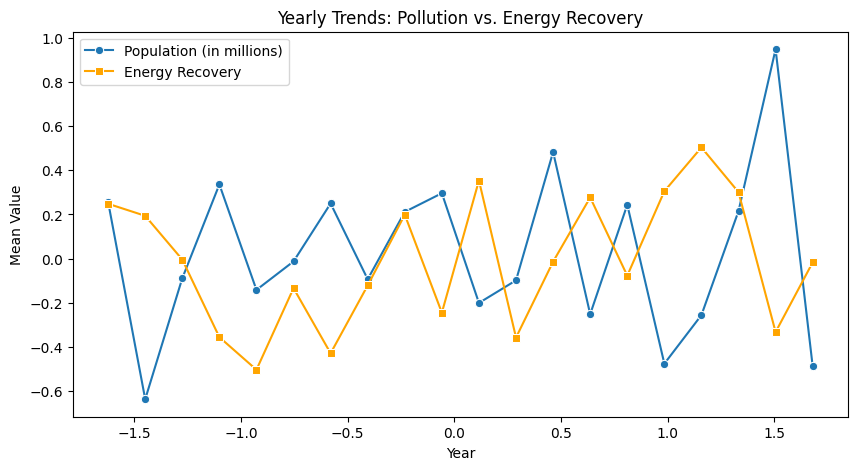

In [179]:
yearly_trends = data.groupby("Year")[["Air_Pollution_Index", "Energy_Recovered (in GWh)"]].mean().reset_index()

# Plot yearly trends
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Air_Pollution_Index", data=yearly_trends, marker="o", label="Population (in millions)")
sns.lineplot(x="Year", y="Energy_Recovered (in GWh)", data=yearly_trends, marker="s", label="Energy Recovery", color="orange")

plt.title("Yearly Trends: Pollution vs. Energy Recovery")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.legend()
plt.show()


In [180]:
# Energy Consumption per Capita
# Calculate energy consumption per capita for better analysis.
data['Energy_Consumption_Per_Capita'] = data['Energy_Consumption_Per_Capita (in MWh)'] / data['Population (in millions)']
data[['Country', 'Energy_Consumption_Per_Capita']].head()

,Country,Energy_Consumption_Per_Capita
0,-0.232434,-0.513878
1,1.173213,-1.301593
2,0.952326,1.876779
3,-1.015580,2.422249
4,-0.854934,0.422433


In [181]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [182]:
lmodel = LinearRegression()
lomodel=LogisticRegression()

In [183]:
lmodel.fit(x_train,y_train)

LinearRegression()

In [184]:
y_pred = lmodel.predict(x_test)

In [185]:
y_pred_train = lmodel.predict(x_train)

In [186]:
y_pred_train

array([-0.14226833, -0.10728233, -0.03539737,  0.03946531, -0.15075128,
       -0.01991642, -0.01969176,  0.12267548,  0.18002369,  0.14280734,
       -0.24038911,  0.05933041, -0.28144981, -0.11746714, -0.24871805,
        0.08036432,  0.09755514, -0.22570566, -0.36399406,  0.09531273,
        0.06641713, -0.19928171, -0.30938083, -0.3141936 , -0.13835602,
        0.17282091, -0.34739459, -0.21829456,  0.00815916,  0.22686787,
        0.21907359,  0.07654082,  0.14209808,  0.18470766, -0.05505125,
       -0.02746288, -0.20611225, -0.03027508,  0.13582669,  0.26542536,
        0.2024671 , -0.29892873, -0.22242828,  0.04252015,  0.04631497,
        0.07530203, -0.09616524, -0.09153259, -0.38482773,  0.26457158,
       -0.22058791, -0.27553331,  0.04727512, -0.26677702, -0.22020125,
        0.17671933, -0.27524398,  0.10228652, -0.14874969,  0.13364944,
       -0.11247019, -0.14367766,  0.27653468, -0.30923966, -0.34215773,
       -0.14444448, -0.35385684, -0.01650959,  0.21021213,  0.08

In [187]:
y_train

134   -0.394136
66    -1.619288
26    -1.266431
113   -0.413076
168    1.501777
         ...   
67    -1.441054
192   -1.089288
117   -0.238931
47    -1.607910
172    1.500006
Name: Energy_Recovered (in GWh), Length: 160, dtype: float64

In [188]:
y_pred

array([-0.07224261,  0.01732545,  0.04699675,  0.23511637,  0.22392198,
       -0.05471375, -0.09054378, -0.27869657,  0.04135705,  0.01908273,
        0.27310819,  0.07488803, -0.022718  ,  0.11191301, -0.14976374,
       -0.18203892,  0.27123022,  0.18916603,  0.13819608, -0.34526504,
       -0.15076338,  0.26981538, -0.24438034, -0.33443049,  0.09401229,
        0.26523387, -0.21618539, -0.0232117 , -0.06320832, -0.37875785,
       -0.32734587,  0.16800056,  0.18102331, -0.04838014, -0.1582813 ,
       -0.34642087, -0.16294721, -0.18204742, -0.30972279,  0.09083413])

In [189]:
y_test

18     1.207106
170   -1.103119
107    1.224071
98    -0.390525
177   -0.041688
182    0.495261
5     -0.846124
146    0.741627
12    -0.565284
152    0.720302
61     0.353274
125    1.310531
180   -0.058925
154    0.337059
80     1.383159
7      1.631978
33     1.293770
130   -1.106185
37     0.864401
74    -0.412804
183   -0.191579
145   -1.158851
45     1.096391
159   -0.587358
60     1.585239
123    1.361834
179    0.323364
185    0.300812
122   -0.723418
44    -1.091604
16     0.032031
55     0.758592
150   -1.421568
111    1.578154
22    -0.282603
189    0.392314
129   -0.034943
4     -1.499375
83     0.534914
106   -0.181018
Name: Energy_Recovered (in GWh), dtype: float64

In [190]:
accuracy_score=accuracy_score(y_train.round(), y_pred_train.round())

In [191]:
accuracy_score

0.26875

In [192]:
# Convert continuous values to discrete classes by rounding
y_test_rounded = y_test.round()
y_pred_rounded = y_pred.round()

# Calculate accuracy score
from sklearn import metrics
accuracy_score_test = metrics.accuracy_score(y_test_rounded, y_pred_rounded)

In [193]:
accuracy_score_test

0.375

In [194]:
from sklearn.metrics import mean_absolute_error

# Calculate R-squared value
R2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Scaled Error (MASE)
naive_forecast = y_test.shift(1).dropna()  # Naive forecast (lagged values)
mase_denominator = mean_absolute_error(y_test[1:], naive_forecast)
mase = mean_absolute_error(y_test, y_pred) / mase_denominator if mase_denominator != 0 else float('inf')

print("R2:", R2)
print("MASE:", mase)

R2: -0.08803585104591893
MASE: 0.653155156231493


In [195]:
def categorize_pollution(value):
    if value < -0.5:
        return 0  # Low Pollution
    elif value < 0.5:
        return 1  # Medium Pollution
    else:
        return 2  # High Pollution

data["Severity"] = data["Air_Pollution_Index"].apply(categorize_pollution)


In [196]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    float64
 1   Year                                    200 non-null    float64
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [197]:
data

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Energy_Consumption_Per_Capita,Severity
0,-0.232434,-0.753796,1.376167,0.193880,-0.619764,1.543328,-0.697051,-1.356325,1.079423,0.874923,0.561742,-1.093143,-0.737646,-0.513878,2
1,1.173213,-1.449340,-1.403578,-1.153098,1.028744,0.124915,1.618760,-1.284276,0.700701,0.600289,-0.756197,0.580978,-0.023527,-1.301593,0
2,0.952326,1.158950,-1.330788,-0.668076,1.142400,0.123888,1.560644,1.718910,-1.493780,-0.395504,0.667825,0.355836,1.156054,1.876779,0
3,-1.015580,1.506722,1.494394,-1.009403,0.431675,0.809131,-0.785350,-1.106232,-0.716061,-1.064327,-1.556310,-0.642506,-0.693157,2.422249,2
4,-0.854934,-0.232138,-0.021926,0.262567,1.138106,0.882681,-1.499375,-0.689181,0.502825,1.024815,0.612087,1.448956,0.312447,0.422433,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.068776,-0.927682,-0.968336,-0.765207,-0.862482,-0.124771,-1.221055,-1.387500,-0.845005,-1.420012,-0.567406,-0.199268,-1.054365,2.847446,0
196,-1.517596,-1.275454,-0.878956,0.124351,-0.316683,0.802869,-1.598099,1.478517,-0.911504,0.862853,1.032820,0.171741,1.231436,6.013842,0
197,-0.011546,0.289520,-0.461800,0.671106,-0.996342,-1.843872,0.223619,0.940922,0.856407,0.014417,0.840433,1.388002,-0.329938,0.605499,1
198,1.635068,-1.275454,0.845568,-0.030300,0.643326,0.583847,0.307694,0.273086,0.354418,-1.602284,0.540166,-1.120801,-0.938591,-0.481947,2


In [198]:
xl=data['Country']
yl=data['Severity']

In [199]:
xl

0     -0.232434
1      1.173213
2      0.952326
3     -1.015580
4     -0.854934
         ...   
195    0.068776
196   -1.517596
197   -0.011546
198    1.635068
199   -0.955338
Name: Country, Length: 200, dtype: float64

In [200]:
yl

0      2
1      0
2      0
3      2
4      1
      ..
195    0
196    0
197    1
198    2
199    0
Name: Severity, Length: 200, dtype: int64

In [201]:
xl=np.array(xl).reshape(-1,1)
yl=np.array(yl).reshape(-1,1)

In [202]:
xl_train, xl_test, yl_train, yl_test = train_test_split(xl, yl, test_size=0.2, random_state=0)

In [203]:
lomodel.fit(xl_train,yl_train)

c:\Users\Asus\100DaysML\MODELS\Global_Pollution\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [204]:
yl_pred=lomodel.predict(xl_test)

In [205]:
yl_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1])

In [206]:
yl_test

array([[0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [2],
       [2],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [1],
       [1],
       [2]])

In [207]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluation Metrics
accuracy_metric = metrics.accuracy_score(yl_test, yl_pred)
print("Accuracy:", accuracy_metric)

precision = precision_score(yl_test, yl_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(yl_test, yl_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(yl_test, yl_pred, average='weighted')
print("F1-score:", f1)

conf_matrix = confusion_matrix(yl_test, yl_pred)
print("Confusion Matrix:")
print(conf_matrix)
    

Accuracy: 0.275
Precision: 0.2758928571428571
Recall: 0.275
F1-score: 0.2664688601645123
Confusion Matrix:
[[3 7 1]
 [6 6 4]
 [3 8 2]]


Linear Regression Metrics:
R2 Score: -0.08803585104591893
Mean Absolute Scaled Error (MASE): 0.653155156231493

Logistic Regression Metrics:
Accuracy: 0.275
Precision: 0.2758928571428571
Recall: 0.275
F1-score: 0.2664688601645123

Confusion Matrix for Linear Regression (rounded predictions):


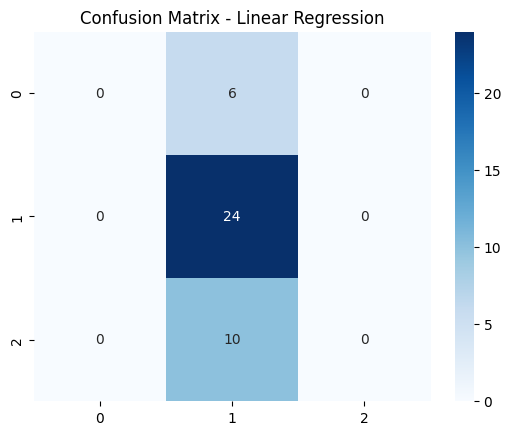


Confusion Matrix for Logistic Regression:


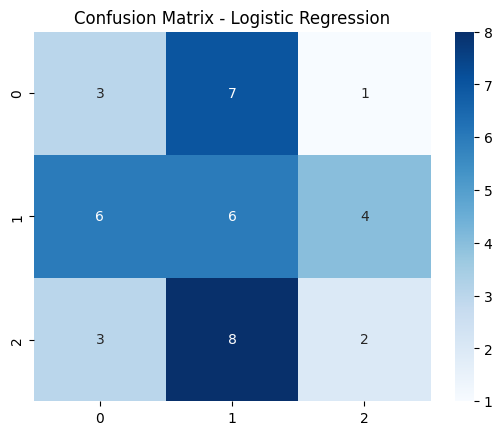


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.25      0.27      0.26        11
           1       0.29      0.38      0.32        16
           2       0.29      0.15      0.20        13

    accuracy                           0.28        40
   macro avg       0.27      0.27      0.26        40
weighted avg       0.28      0.28      0.27        40



In [208]:
# Compare Linear Regression and Logistic Regression models based on their performance and metrics.
# Visualize results using confusion matrices and classification reports.

from sklearn.metrics import classification_report

# Linear Regression Metrics
print("Linear Regression Metrics:")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Scaled Error (MASE): {mase}")

# Logistic Regression Metrics
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_metric}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrices
print("\nConfusion Matrix for Linear Regression (rounded predictions):")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Linear Regression")
plt.show()

print("\nConfusion Matrix for Logistic Regression:")
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Classification Report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(yl_test, yl_pred))

In [209]:
# Insights on how different pollution levels affect energy recovery
pollution_vs_energy = data.groupby("Severity")["Energy_Recovered (in GWh)"].mean()
print("Average Energy Recovery by Pollution Severity Levels:")
print(pollution_vs_energy)

# Suggest countries that could benefit from improvement
high_pollution_countries = data[data["Severity"] == 2]["Country"].unique()
print("\nCountries with High Pollution Levels:")
print(high_pollution_countries)

# Recommendations for reducing pollution and improving energy recovery
recommendations = """
1. Invest in renewable energy sources to reduce reliance on fossil fuels.
2. Implement stricter regulations on industrial waste management.
3. Promote public awareness campaigns on reducing plastic and water pollution.
4. Encourage international collaboration to share best practices for pollution control.
5. Provide incentives for industries adopting green technologies.
"""
print("\nRecommendations for Reducing Pollution and Improving Energy Recovery:")
print(recommendations)


Average Energy Recovery by Pollution Severity Levels:
Severity
0   -0.073209
1    0.042265
2    0.021543
Name: Energy_Recovered (in GWh), dtype: float64

Countries with High Pollution Levels:
[-0.23243373 -1.01557978 -1.03566045  1.35393904  1.29369703  0.20934096
  1.53466505  1.21337436 -1.71840316  1.47442304 -1.2565478  -0.51356308
 -1.65816115 -0.2525144   0.83184167  1.49450371 -0.49348241  0.02861495
 -1.05574112 -1.29670913  0.12901829  0.43022831 -0.37299841 -0.53364375
  1.43426171  1.71539106 -0.69428909 -1.59791915 -1.19630579  1.07280968
  1.05272902 -0.73445043  0.99248701 -0.47340175 -0.77461177  1.39410037
  0.49047031  0.47038965 -0.71436976 -0.45332108  0.2495023   0.39006697
  1.57482638  1.65514905  1.59490705  0.34990564 -1.21638646 -1.47743514
 -1.07582178  1.41418104 -1.67824182 -0.55372442  1.27361636  0.61095432
  0.36998631  0.97240634 -1.3770318   0.41014764 -0.1922724   0.67119633
  0.3097443   0.811761    0.87200301 -0.89509577  0.89208367 -1.49751581
  1.6